Price Paid Data tracks the residential property sales in England and Wales that are lodged with HM Land Registry for registration.

The dataset is a reliable source of house price information and consists of more than a million definitive records for the annual year 2018

In [ ]:
#mount drive
#elsse can manually do it from the files tab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Can add through directory path or directly pass the path over
# df = pd.read_csv(dir_path + 'pp-2018.csv' .......
# Define the path where data is kept


dir_path = '/content/drive/MyDrive/Copy of of pp-2018.csv'


In [ ]:
# directly added through directory path
# labelling
# importing pands pd  as mandatory

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Copy of pp-2018.csv', names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [ ]:
df.shape

(1024432, 16)

In [ ]:
#Select only record type A and property type not "O"
#filtered record status
# Slicing and df  will get updated
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

# Selecting transactions only for 2018
df = df[(df["Sale Date"].dt.year==2018)]

In [ ]:
#reduced the size as we now know it is filtered
df.shape

(959003, 16)

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


### **First Objective : Obtain the trend of sales volume across months**

In [ ]:
from datetime import datetime

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Need to change the date in string format to extract first 7 characters we need  month and yer
# Can check with df.info
#string  object will support indexing hence we can access the date as a string

df['Month']= df['Sale Date'].apply(lambda x: x.strftime("%Y-%m-%d") [:7])

In [ ]:
#added now coulumn month
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959003 entries, 0 to 1024431
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TID            959003 non-null  object        
 1   Price          959003 non-null  int64         
 2   Sale Date      959003 non-null  datetime64[ns]
 3   Postcode       958301 non-null  object        
 4   Property Type  959003 non-null  object        
 5   New Build      959003 non-null  object        
 6   Tenure         959003 non-null  object        
 7   PAON           959003 non-null  object        
 8   SAON           127930 non-null  object        
 9   Street         945361 non-null  object        
 10  Locality       359120 non-null  object        
 11  Town/City      959003 non-null  object        
 12  District       959001 non-null  object        
 13  County         959003 non-null  object        
 14  PPD Category   959003 non-null  object        
 15  Reco

In [ ]:
# Need to check property sales across months
monthly_sales_vol = df["Month"].value_counts()

In [ ]:
print(monthly_sales_vol)

Month
2018-08    95382
2018-11    92427
2018-06    90178
2018-10    86892
2018-07    83082
2018-12    79754
2018-03    78070
2018-09    77836
2018-05    76325
2018-04    67094
2018-02    66959
2018-01    65004
Name: count, dtype: int64


In [ ]:
type(monthly_sales_vol)

pandas.core.series.Series

In [ ]:
# Another way
#monthly_sales_vol.sort_index(inplace=True)

monthly_sales_vol = df.groupby("Month").size()


In [ ]:
monthly_sales_vol

,0
Month,
2018-01,65004
2018-02,66959
2018-03,78070
2018-04,67094
2018-05,76325
2018-06,90178
2018-07,83082
2018-08,95382
2018-09,77836


In [ ]:
# Controls the default size of all figures

plt.rcParams['figure.figsize'] = (10, 5)

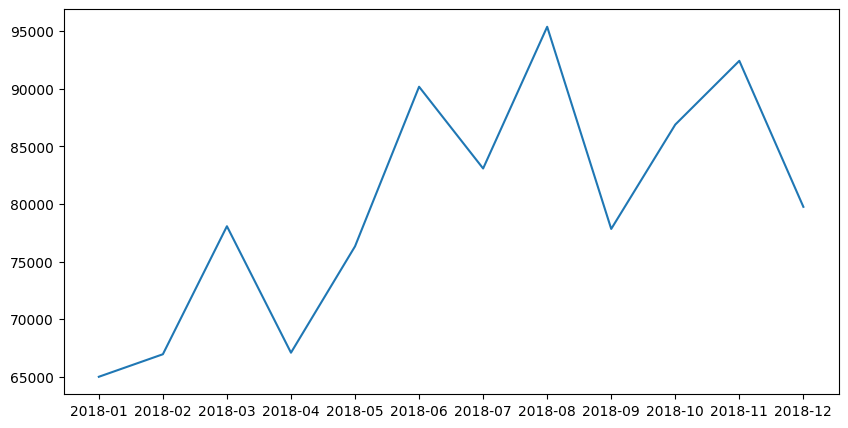

In [ ]:
# final plotting

plt.plot(monthly_sales_vol)

Text(0.5, 0, 'Month')

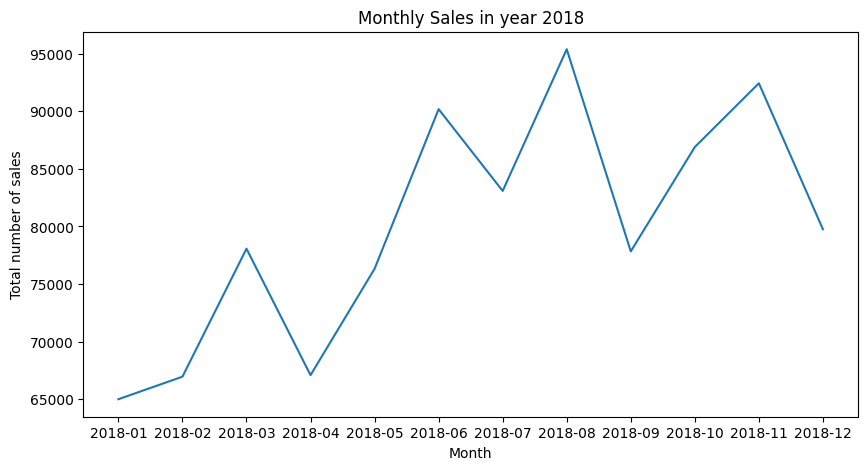

In [ ]:
# labelling the chart
plt.plot(monthly_sales_vol)

plt.title('Monthly Sales in year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')


## Second objective :  Observe the daily sales volume in the month of July 2018


In [ ]:
# Daily sales volume for July 2018
# Filter July month only
df = df[df['Sale Date'].dt.month == 7]
daily_sales_vol = df.groupby("Sale Date").size()
#daily_sales_vol = df["Sale Date"].value_counts()

In [ ]:
daily_sales_vol

,0
Sale Date,
2018-07-01,18
2018-07-02,2931
2018-07-03,1828
2018-07-04,2064
2018-07-05,2358
2018-07-06,8400
2018-07-07,18
2018-07-08,11
2018-07-09,2259


Text(0.5, 0, 'Date')

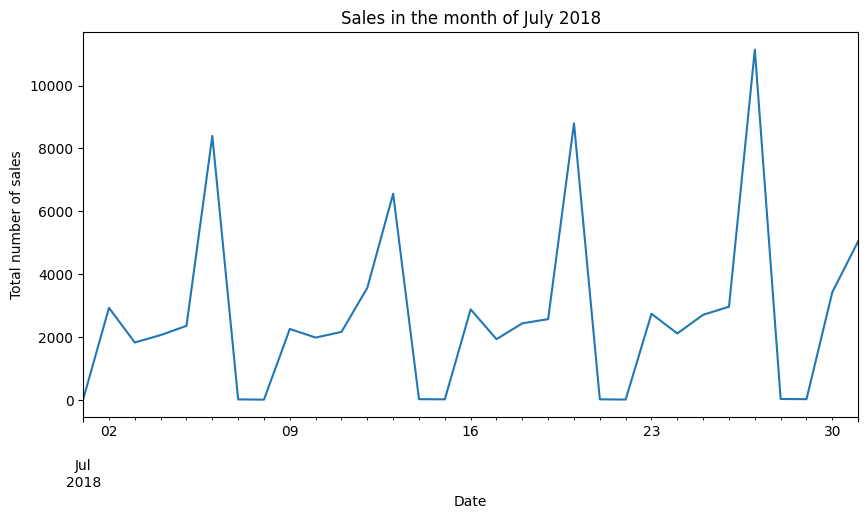

In [ ]:
# Create the plot object
daily_sales_vol.plot()

plt.title('Sales in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')

# declared ealriler hence all will be printed in same  format
# plt.rcParams['figure.figsize'] = (10, 5)

## Third Objective :  Comparing the daily sales volume of different property types in July

In [ ]:
# grouping the dataset by both 'Sale Date' and 'Property Type'
# groupby(['Sale Date','Property Type']) creates groups for each unique combination of date and property type.
# Sale Date'].count() counts how many records (rows) fall into each group, i.e., the number of transactions.

daily_price = df.groupby(['Sale Date','Property Type'])['Sale Date'].count()
daily_price

Sale Date   Property Type
2018-01-01  D                12
            F                12
            O                12
            S                23
            T                16
                             ..
2018-12-31  D                13
            F                30
            O                48
            S                14
            T                11
Name: Sale Date, Length: 1776, dtype: int64

In [ ]:
# Prperty types should be columns and sale date should be row using unstack

daily_price = df.groupby(['Sale Date','Property Type'])['Sale Date'].count().unstack()
daily_price

Property Type,D,F,O,S,T
Sale Date,,,,,
2018-01-01,12.0,12.0,12.0,23.0,16.0
2018-01-02,89.0,141.0,120.0,108.0,144.0
2018-01-03,328.0,359.0,121.0,406.0,488.0
2018-01-04,454.0,347.0,158.0,480.0,546.0
2018-01-05,1337.0,1188.0,351.0,1639.0,1802.0
...,...,...,...,...,...
2018-12-27,9.0,50.0,14.0,9.0,13.0
2018-12-28,48.0,20.0,31.0,27.0,35.0
2018-12-29,4.0,3.0,1.0,NaN,2.0


In [ ]:
# Keep only July rows first
df_july = df[df['Sale Date'].dt.month == 7]

# Then group by Sale Date and Property Type
daily_price = df_july.groupby(['Sale Date','Property Type']).size().unstack()

daily_price


Property Type,D,F,O,S,T
Sale Date,,,,,
2018-07-01,4,2,12,7,5
2018-07-02,705,564,282,782,880
2018-07-03,443,426,220,436,523
2018-07-04,529,401,206,528,606
2018-07-05,623,453,282,614,668
2018-07-06,1955,1662,432,2422,2361
2018-07-07,7,6,7,2,3
2018-07-08,2,4,2,1,4
2018-07-09,498,447,160,638,676


Text(0.5, 0, 'Date')

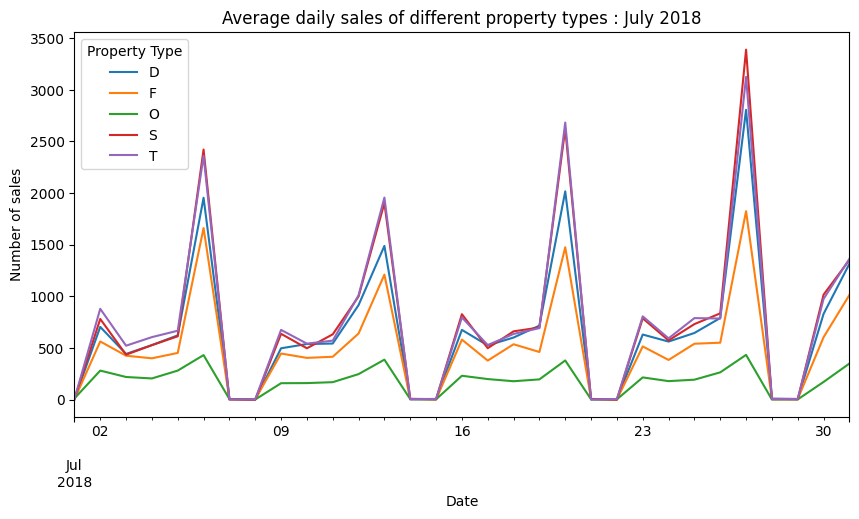

In [ ]:
daily_price.plot()

plt.title('Average daily sales of different property types : July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
# plt.rcParams['figure.figsize'] = (10, 5)

#property type "O" (Other) and focus only on Detached ("D"),
#Semi Detached ("S"), Flats ("F") and Terraced ("T") houses.

### Creating a bar plot


In [ ]:
# Number of residential property transactions in July 2018 by property type
sales_by_type = df["Property Type"].value_counts()

In [ ]:
sales_by_type

,count
Property Type,
T,274610
S,268026
D,233324
F,183043
O,65429


Text(0.5, 0, 'Property Type')

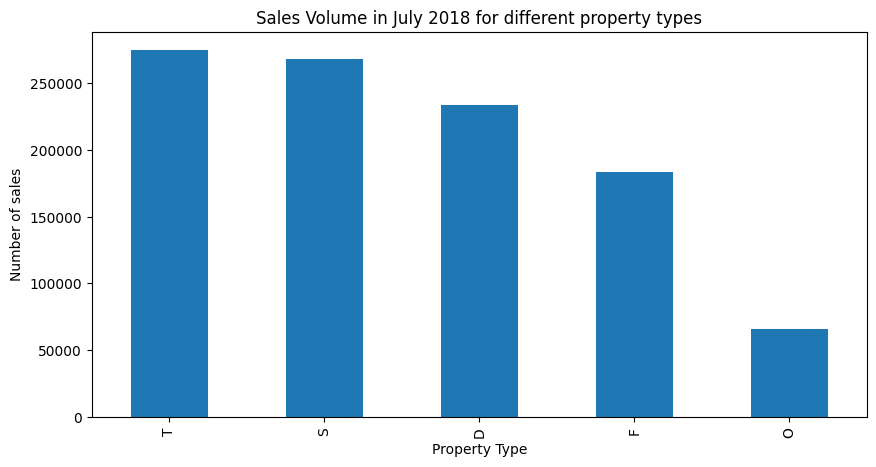

In [ ]:
# Creating  graph
sales_by_type.plot(kind='bar')

plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Number of sales')
plt.xlabel('Property Type')

### Creating a bar plot

In [ ]:
df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack()

Property Type,D,F,O,S,T
Sale Date,,,,,
2018-01-01,528750.000000,164858.333333,1.032940e+06,218997.826087,183343.125000
2018-01-02,379617.651685,363347.709220,2.886513e+05,242416.055556,201819.659722
2018-01-03,390462.304878,278282.256267,5.870763e+05,256738.347291,243132.819672
2018-01-04,441964.171806,317978.002882,4.012344e+05,280331.137500,277350.714286
2018-01-05,383288.124907,296605.273569,1.467256e+06,258966.791946,231867.987791
...,...,...,...,...,...
2018-12-27,418509.444444,671831.000000,1.410499e+07,147822.222222,147826.538462
2018-12-28,450611.479167,373572.500000,1.441695e+06,274237.962963,190121.800000
2018-12-29,248248.750000,278331.666667,4.600000e+05,NaN,132500.000000


In [ ]:

df_july = df[df['Sale Date'].dt.month == 7]
# Now group only July data by Sale Date and Property Type
daily_price_july = df_july.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack()

daily_price_july


Property Type,D,F,O,S,T
Sale Date,,,,,
2018-07-01,540000.000000,109000.000000,6.461098e+05,172571.428571,217400.000000
2018-07-02,445515.668085,350084.714539,1.508896e+06,270838.773657,255916.592045
2018-07-03,447700.440181,373247.507042,6.184512e+05,247046.855505,269273.124283
2018-07-04,438009.792060,334057.576060,8.765388e+05,280296.412879,242835.457096
2018-07-05,458506.836276,333304.015453,9.553915e+05,269661.234528,245529.871257
2018-07-06,388179.344246,280558.135379,1.397370e+06,248347.932700,223573.152478
2018-07-07,383420.714286,267990.833333,1.027107e+06,157500.000000,490333.333333
2018-07-08,213500.000000,147123.750000,4.000000e+03,245000.000000,116250.000000
2018-07-09,401749.847390,301908.429530,1.828333e+06,265197.501567,291172.751479


Text(0.5, 0, 'Property Type')

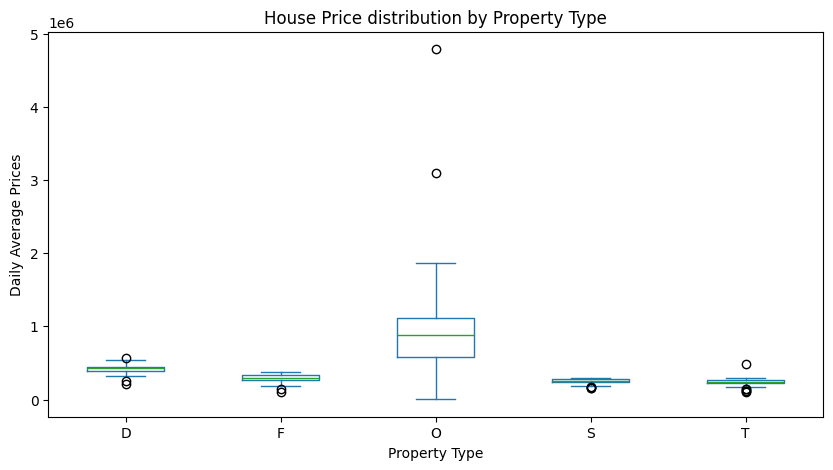

In [ ]:
# Price distribution box plot
# Need to fix
df_july.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack().plot(kind="box")
plt.title('House Price distribution by Property Type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

Seaborn:
Library built on top of Matplotlib


Speed Dating Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dating_data = pd.read_csv('/content/drive/MyDrive/Copy of Speed Dating Data.csv', encoding = 'unicode_escape')

In [ ]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dating_data.columns.values


array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

Text(0, 0.5, 'Frequency')

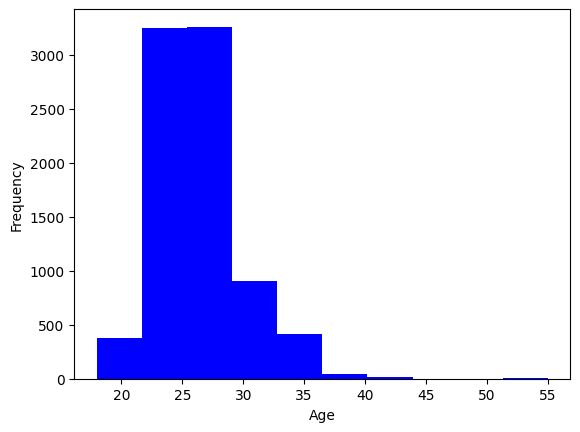

In [ ]:
#creating  histogram
#  Select the 'age' column, excluding rows where age is missing (NaN values)
#- dating_data['age'].isna() → gives True for missing ages.
# ~ → negates it, so you keep only non‑missing ages.
# ['age'] → selects the age column.
# .mean() → computes the average of those values.

age = dating_data[~dating_data['age'].isna()]['age']
plt.hist(age.values, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')

/tmp/ipython-input-1075326702.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age, hist=True)


<Axes: xlabel='age', ylabel='Density'>

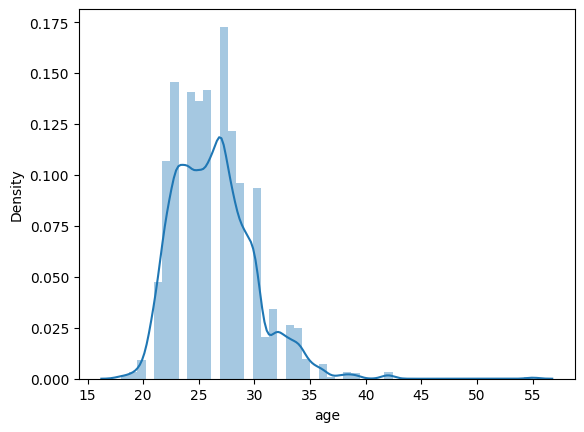

In [ ]:
import seaborn as sns
sns.distplot(age, hist=True)

Correlation heatmap

In [ ]:
# keeping columns : gender, shopping, gaming, concerts, and music
# corr() calculates pairwise correlation between numeric columns

dating_data_df = dating_data[['gender', 'shopping', 'gaming', 'concerts', 'music']]
corr_df = dating_data_df.corr()
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


<Axes: >

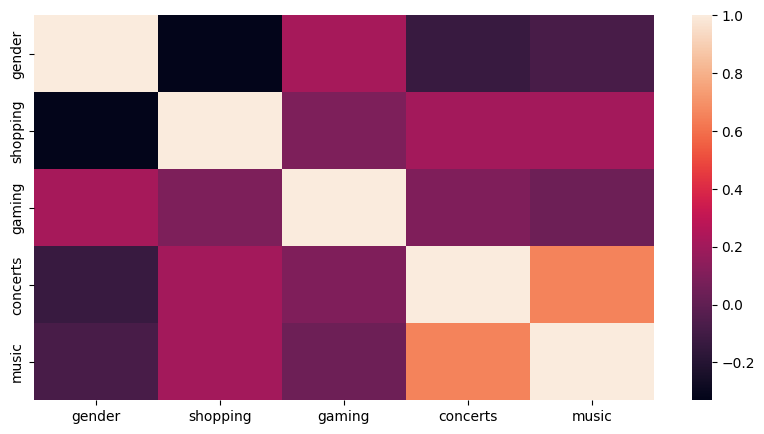

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

<Axes: >

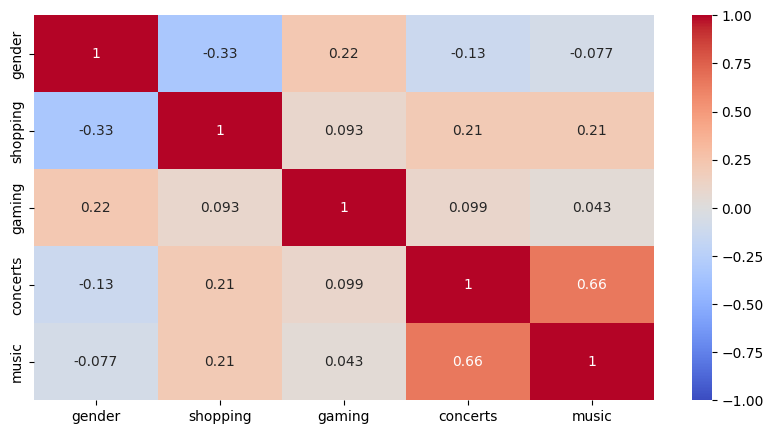

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dating_data_df.corr(), vmin=-1, cmap='coolwarm', annot=True)